In [ ]:
#!pip install pandas
#!pip install openpyxl

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [ ]:
# Load the dataset
df = pd.read_csv("Security vulnerability data.csv")

In [ ]:
# Convert date fields to datetime
datetime_columns = ["finding_created_at", "vulnerability_created_at", "advisory_created_at"]
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df.isnull().sum()

repository_owner                  0
repository_name                   0
repository_ssh_url                0
repository_https_url              0
repository_provider               0
repository_default_branch         0
finding_id                        0
finding_created_at                0
finding_file_name                 0
finding_line_number               0
vulnerability_severity            0
vulnerability_severity_code       0
vulnerability_title               0
vulnerability_fixes            5956
vulnerability_issue_id            0
vulnerability_created_at          0
advisory_name                     0
advisory_issue_id                 0
advisory_created_at               0
sbom_package_name                 0
sbom_package_version              0
dtype: int64

In [ ]:
df.head()

,repository_owner,repository_name,repository_ssh_url,repository_https_url,repository_provider,repository_default_branch,finding_id,finding_created_at,finding_file_name,finding_line_number,...,vulnerability_severity_code,vulnerability_title,vulnerability_fixes,vulnerability_issue_id,vulnerability_created_at,advisory_name,advisory_issue_id,advisory_created_at,sbom_package_name,sbom_package_version
0,owner1,repo1,git@github.com:owner1/repo1.git,https://github.com/owner1/repo1,github,master,34660955,2024-03-31 00:44:38.133322+00:00,file001.xml,0,...,10,Creation of Temporary File in Directory with I...,32.0.0-android||32.0.0-jre,PHEW-00001,2023-10-31 14:16:53.893898+00:00,ghsa,GHSA-00001,2023-10-31 14:16:53.896122+00:00,package1,31.1-android
1,owner1,repo1,git@github.com:owner1/repo1.git,https://github.com/owner1/repo1,github,master,34660955,2024-03-31 00:44:38.133322+00:00,file001.xml,0,...,10,Creation of Temporary File in Directory with I...,32.0.0-android||32.0.0-jre,PHEW-00001,2023-10-31 14:16:53.893898+00:00,cwe,CWE-00001,2023-10-31 14:16:53.896122+00:00,package1,31.1-android
2,owner1,repo1,git@github.com:owner1/repo1.git,https://github.com/owner1/repo1,github,master,34660955,2024-03-31 00:44:38.133322+00:00,file001.xml,0,...,10,Creation of Temporary File in Directory with I...,32.0.0-android||32.0.0-jre,PHEW-00001,2023-10-31 14:16:53.893898+00:00,cve,CVE-00001,2023-10-31 14:16:53.896122+00:00,package1,31.1-android
3,owner1,repo1,git@github.com:owner1/repo1.git,https://github.com/owner1/repo1,github,master,34660955,2024-03-31 00:44:38.133322+00:00,file001.xml,0,...,10,Creation of Temporary File in Directory with I...,32.0.0-android||32.0.0-jre,PHEW-00001,2023-10-31 14:16:53.893898+00:00,phew,PHEW-00001,2023-10-31 14:16:53.896122+00:00,package1,31.1-android
4,owner1,repo1,git@github.com:owner1/repo1.git,https://github.com/owner1/repo1,github,master,34660956,2024-03-31 00:44:38.133322+00:00,file001.xml,0,...,20,Denial of Service (DoS),1.17.6||3.4.0,PHEW-00002,2023-10-31 14:16:54.100702+00:00,cwe,CWE-00002,2023-10-31 14:16:53.366468+00:00,package2,2.8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147680 entries, 0 to 147679
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   repository_owner             147680 non-null  object             
 1   repository_name              147680 non-null  object             
 2   repository_ssh_url           147680 non-null  object             
 3   repository_https_url         147680 non-null  object             
 4   repository_provider          147680 non-null  object             
 5   repository_default_branch    147680 non-null  object             
 6   finding_id                   147680 non-null  int64              
 7   finding_created_at           147680 non-null  datetime64[ns, UTC]
 8   finding_file_name            147680 non-null  object             
 9   finding_line_number          147680 non-null  int64              
 10  vulnerability_severity       147

In [ ]:
# Replace all null values in the DataFrame with 'unknown'
df = df.fillna('unknown')

In [ ]:
# Create combined package + version field
df["package_version"] = df["sbom_package_name"] + " " + df["sbom_package_version"]

In [ ]:
df.head()
df.describe(include='all')

,repository_owner,repository_name,repository_ssh_url,repository_https_url,repository_provider,repository_default_branch,finding_id,finding_created_at,finding_file_name,finding_line_number,...,vulnerability_title,vulnerability_fixes,vulnerability_issue_id,vulnerability_created_at,advisory_name,advisory_issue_id,advisory_created_at,sbom_package_name,sbom_package_version,package_version
count,147680,147680,147680,147680,147680,147680,1.476800e+05,147680,147680,147680.0,...,147680,147680,147680,147680,147680,147680,147680,147680,147680,147680
unique,3,349,352,352,1,4,NaN,NaN,510,NaN,...,208,783,1628,NaN,13,4227,NaN,457,1009,1529
top,owner1,repo181,git@github.com:owner1/repo181.git,https://github.com/owner1/repo181,github,master,NaN,NaN,file001.xml,NaN,...,Denial of Service (DoS),unknown,PHEW-00004,NaN,cwe,CWE-00002,NaN,package6,2.6.7,package6 2.6.7
freq,133280,14259,14259,14259,147680,114987,NaN,NaN,27184,NaN,...,36268,5956,3276,NaN,45188,12889,NaN,13755,7474,7221
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.235227e+07,2024-06-30 11:03:20.915882240+00:00,NaN,0.0,...,NaN,NaN,NaN,2023-12-18 21:58:49.434221824+00:00,NaN,NaN,2023-12-05 20:26:24.739914752+00:00,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,3.465920e+07,2024-03-31 00:07:24.708379+00:00,NaN,0.0,...,NaN,NaN,NaN,2023-10-31 14:16:53.365410+00:00,NaN,NaN,2023-10-31 14:16:53.366468+00:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.467147e+07,2024-03-31 03:37:44.028020992+00:00,NaN,0.0,...,NaN,NaN,NaN,2023-10-31 14:17:01.243312128+00:00,NaN,NaN,2023-10-31 14:16:53.898395904+00:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.231033e+07,2024-06-30 01:38:56.220084992+00:00,NaN,0.0,...,NaN,NaN,NaN,2023-11-01 00:36:36.345656064+00:00,NaN,NaN,2023-10-31 14:18:03.008297984+00:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.006039e+07,2024-09-30 00:31:19.161144064+00:00,NaN,0.0,...,NaN,NaN,NaN,2024-01-16 16:47:44.167426048+00:00,NaN,NaN,2023-11-29 10:32:57.698607104+00:00,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,5.014135e+07,2024-09-30 23:23:54.315167+00:00,NaN,0.0,...,NaN,NaN,NaN,2024-09-25 11:10:58.277302+00:00,NaN,NaN,2025-02-24 05:15:14.867518+00:00,NaN,NaN,NaN


In [ ]:
df.to_excel("Security vulnerability data_cleaned.xlsx", index=False)

Q1: Vulnerability findings on the latest date

In [ ]:
# Clean all date columns to remove timestamps, only keep the date
date_columns = ["finding_created_at", "vulnerability_created_at", "advisory_created_at"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce').dt.date

In [ ]:
# Get most recent date with findings (ignore time)
latest_date = df["finding_created_at"].max()

In [ ]:
# Filter the DataFrame for findings created on the latest date
latest_findings = df[df["finding_created_at"] == latest_date]

In [ ]:
print("Most recent finding date:", latest_date)
print("Count of findings:", latest_findings.shape[0])

Most recent finding date: 2024-09-30
Count of findings: 48263


In [ ]:
# Display latest findings by severity
severity_counts = latest_findings["vulnerability_severity"].value_counts()

# Convert to DataFrame and append total row
severity_df = severity_counts.reset_index()
severity_df.columns = ["Severity", "Count"]
total_row = pd.DataFrame([["Total", severity_df["Count"].sum()]], columns=["Severity", "Count"])
severity_df = pd.concat([severity_df, total_row], ignore_index=True)

In [ ]:
# Print summary info
print("Most recent finding date:", latest_date)
print("Vulnerability Severity Counts on", latest_date)
print(severity_df)

Most recent finding date: 2024-09-30
Vulnerability Severity Counts on 2024-09-30
   Severity  Count
0      high  21904
1    medium  19815
2       low   5555
3  critical    989
4     Total  48263


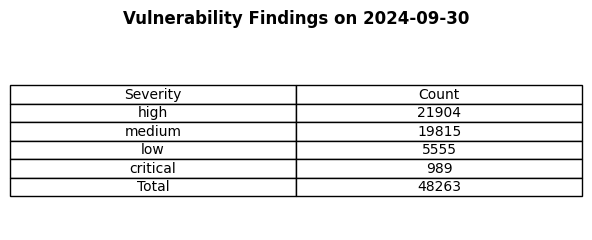

In [ ]:
# Plot as a table chart
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis("off")
table = ax.table(cellText=severity_df.values,
                 colLabels=severity_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title(f"Vulnerability Findings on {latest_date}", fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

Q2: Severity distribution on latest date

In [ ]:
# Count severity distribution
severity_dist = latest_findings["vulnerability_severity"].value_counts().reset_index()
severity_dist.columns = ["Severity", "Count"]

C:\Users\NH966DT\AppData\Local\Temp\ipykernel_36256\1016610121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=severity_dist, x="Severity", y="Count", palette="viridis")


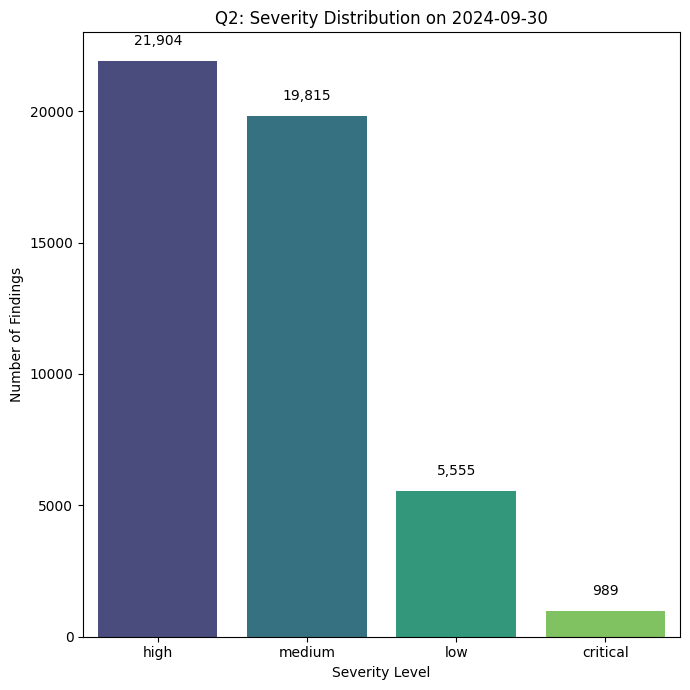

In [ ]:
# Plot severity distribution
plt.figure(figsize=(7, 7))
barplot = sns.barplot(data=severity_dist, x="Severity", y="Count", palette="viridis")

# Data labels on each bar
for index, row in severity_dist.iterrows():
    barplot.text(index, row["Count"] + 500, f'{row["Count"]:,}', color='black', ha='center', va='bottom', fontsize=10)
    
plt.title(f"Q2: Severity Distribution on {latest_date}")
plt.xlabel("Severity Level")
plt.ylabel("Number of Findings")
plt.tight_layout()
plt.show()


Q3: Top Package and version on the latest date

In [ ]:
# Top 10 most common package+version combinations on latest date
top_packages = (
    latest_findings["package_version"]
    .value_counts()
    .head(10)
    .reset_index()
)
top_packages.columns = ["Package Version", "Count"]

In [ ]:
# Labels with package version only (matplotlib handles the percentage)
labels = top_packages["Package Version"]
colors = sns.color_palette("mako", n_colors=len(top_packages))

([<matplotlib.patches.Wedge at 0x1a8fe1cb150>,
 [Text(-1.093260355885199, 0.12158040240831658, 'package6 2.6.7\n2241 findings\n(18.7%)'),
  Text(-0.6454797351775916, -0.8907052887880853, 'package5 1.3\n1782 findings\n(14.9%)'),
  Text(0.2976601725376404, -1.0589610104649096, 'package235 2.2.0\n1656 findings\n(13.8%)'),
  Text(0.9694679043083716, -0.519742226989432, 'package4 5.3.31\n1414 findings\n(11.8%)'),
  Text(1.0726576524130738, 0.24373255982669526, 'package22 9.0.63\n1316 findings\n(11.0%)'),
  Text(0.7851336838511376, 0.7704317610809811, 'package5 1.28\n792 findings\n(6.6%)'),
  Text(0.4082144284027829, 1.021450429753588, 'package22 9.0.83\n790 findings\n(6.6%)'),
  Text(-0.015408717293103577, 1.0998920726286654, 'package17 1.2.12\n714 findings\n(6.0%)'),
  Text(-0.4164705614444994, 1.0181121114347396, 'package18 1.2.12\n714 findings\n(6.0%)'),
  Text(-0.7286671843476249, 0.8240413426854897, 'package15 1.8.1\n567 findings\n(4.7%)')])

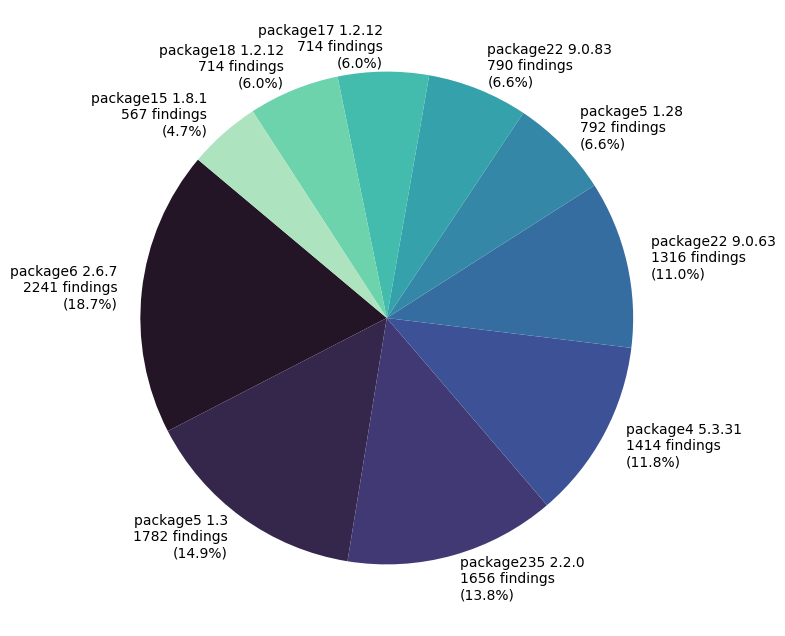

In [ ]:
top_packages["Label"] = top_packages.apply(
    lambda row: f"{row['Package Version']}\n{row['Count']} findings\n({row['Count'] / top_packages['Count'].sum() * 100:.1f}%)",
    axis=1
)

plt.figure(figsize=(8, 8))
plt.pie(
    top_packages["Count"],
    labels=top_packages["Label"],
    autopct=None,
    startangle=140,
    colors=colors
)

Q4: Package and version contributing to the number of findings between the start and end of the dataset period

In [ ]:
# 1. Date-range based window for findings between start and end of dataset period

from datetime import timedelta

# Ensure 'finding_created_at' is datetime
df["finding_created_at"] = pd.to_datetime(df["finding_created_at"], errors='coerce')

In [ ]:
# Sort by finding_created_at
df_sorted = df.sort_values("finding_created_at")

In [ ]:
# Define date range for windowing
start_date = df_sorted["finding_created_at"].min()
end_date = df_sorted["finding_created_at"].max()

In [ ]:
# Define 7-day windows
start_range = start_date + timedelta(days=7)
end_range = end_date - timedelta(days=7)

In [ ]:
# Create start and end windows
start_window = df_sorted[df_sorted["finding_created_at"] <= start_range]
end_window = df_sorted[df_sorted["finding_created_at"] >= end_range]

In [ ]:
# Print the actual window dates
print(f"Start window: {start_date.date()} to {start_range.date()}")
print(f"End window: {end_range.date()} to {end_date.date()}")

Start window: 2024-03-31 to 2024-04-07
End window: 2024-09-23 to 2024-09-30


In [ ]:
# Identify unique package versions
start_packages = set(start_window["package_version"].unique())
end_packages = set(end_window["package_version"].unique())

In [ ]:
# Identify new packages (only in end window)
new_packages = end_packages - start_packages

In [ ]:
# Filter for findings related to new packages in the end window
new_findings = end_window[end_window["package_version"].isin(new_packages)]

In [ ]:
# Count how many findings each new package contributed
new_package_counts = new_findings["package_version"].value_counts().reset_index()
new_package_counts.columns = ["New Package Version", "Findings Count"]

C:\Users\NH966DT\AppData\Local\Temp\ipykernel_36256\730268103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=new_package_counts.head(10), y="New Package Version", x="Findings Count", palette="rocket")


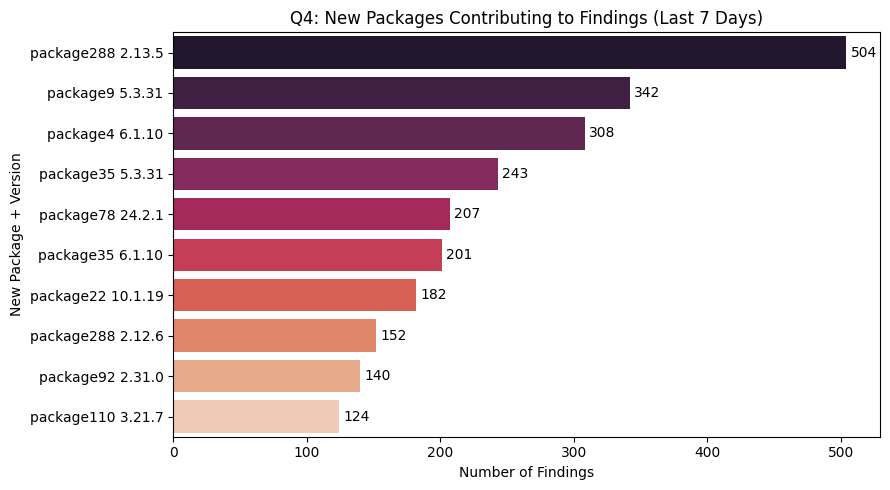

  New Package Version  Findings Count
0   package288 2.13.5             504
1     package9 5.3.31             342
2     package4 6.1.10             308
3    package35 5.3.31             243
4    package78 24.2.1             207
5    package35 6.1.10             201
6   package22 10.1.19             182
7   package288 2.12.6             152
8    package92 2.31.0             140
9   package110 3.21.7             124


In [ ]:
# Plot top 10
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
ax = sns.barplot(data=new_package_counts.head(10), y="New Package Version", x="Findings Count", palette="rocket")

# Add data labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)
plt.title("Q4: New Packages Contributing to Findings (Last 7 Days)")
plt.xlabel("Number of Findings")
plt.ylabel("New Package + Version")
plt.tight_layout()
plt.show()

# Preview for reporting/export
print(new_package_counts.head(10))

In [ ]:
# 2. Percentile based window for findings between start and end of dataset period
# Sort data chronologically
df_sorted = df.sort_values("finding_created_at")

In [ ]:
# Define 10% start and end windows
ten_percent = int(len(df_sorted) * 0.1)
start_window = df_sorted.head(ten_percent)
end_window = df_sorted.tail(ten_percent)

In [ ]:
# Get package_version sets
start_packages = set(start_window["package_version"].unique())
end_packages = set(end_window["package_version"].unique())

In [ ]:
# Identify packages that are new (only in the end window)
new_packages = end_packages - start_packages

In [ ]:
# Filter for findings related to new packages in the end window
new_findings = end_window[end_window["package_version"].isin(new_packages)]

In [ ]:
# Count how many findings each new package contributed
new_package_counts = new_findings["package_version"].value_counts().reset_index()
new_package_counts.columns = ["New Package Version", "Findings Count"]

C:\Users\NH966DT\AppData\Local\Temp\ipykernel_36256\3611810388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=new_package_counts.head(10), y="New Package Version", x="Findings Count", palette="rocket")


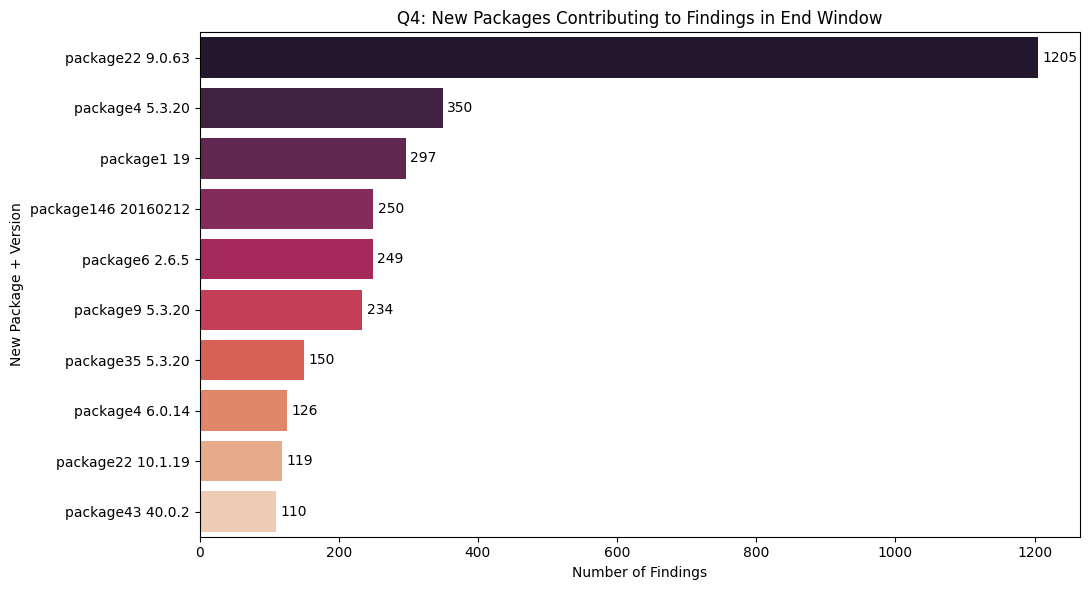

   New Package Version  Findings Count
0     package22 9.0.63            1205
1      package4 5.3.20             350
2          package1 19             297
3  package146 20160212             250
4       package6 2.6.5             249
5      package9 5.3.20             234
6     package35 5.3.20             150
7      package4 6.0.14             126
8    package22 10.1.19             119
9     package43 40.0.2             110


In [ ]:
# Output top 10 for visualisation
plt.figure(figsize=(11, 6))
ax = sns.barplot(data=new_package_counts.head(10), y="New Package Version", x="Findings Count", palette="rocket")

# Add data labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.title("Q4: New Packages Contributing to Findings in End Window")
plt.xlabel("Number of Findings")
plt.ylabel("New Package + Version")
plt.tight_layout()
plt.show()

# Preview for tabular reporting
print(new_package_counts.head(10))


Q5: Prioritisation of Critical Vulnerability on Latest Date

In [ ]:
from datetime import datetime

# Filter for critical severity findings on the most recent date
latest_crit = latest_findings[latest_findings["vulnerability_severity"].str.lower() == "critical"].copy()

In [ ]:
# Convert vulnerability_created_at to datetime and calculate age in days
latest_crit["vulnerability_created_at"] = pd.to_datetime(latest_crit["vulnerability_created_at"], errors='coerce')
today = pd.to_datetime(datetime.today())
latest_crit["vuln_age_days"] = (today - latest_crit["vulnerability_created_at"]).dt.days


In [ ]:
print(latest_crit.columns.tolist())

['repository_owner', 'repository_name', 'repository_ssh_url', 'repository_https_url', 'repository_provider', 'repository_default_branch', 'finding_id', 'finding_created_at', 'finding_file_name', 'finding_line_number', 'vulnerability_severity', 'vulnerability_severity_code', 'vulnerability_title', 'vulnerability_fixes', 'vulnerability_issue_id', 'vulnerability_created_at', 'advisory_name', 'advisory_issue_id', 'advisory_created_at', 'sbom_package_name', 'sbom_package_version', 'package_version', 'vuln_age_days']


In [ ]:
# Identify most common vulnerabilities and packages
top_cves = latest_crit["vulnerability_issue_id"].value_counts().reset_index()
top_cves.columns = ["CVE ID", "Count"]

top_packages = latest_crit["package_version"].value_counts().reset_index()
top_packages.columns = ["Package Version", "Count"]

In [ ]:
# Merge to get full context of most frequent CVE
prioritised_vuln = latest_crit[latest_crit["vulnerability_issue_id"] == top_cves.iloc[0]["CVE ID"]]

In [ ]:
# Output summary
print("Q5: Prioritisation of Critical Vulnerability on Latest Date")
print(f"Most recent finding date: {latest_date}")
print(f"Number of critical findings on that day: {latest_crit.shape[0]}")
print(f"\nTop CVE ID: {top_cves.iloc[0]['CVE ID']} with {top_cves.iloc[0]['Count']} occurrences")
print(f"Top affected package: {top_packages.iloc[0]['Package Version']} with {top_packages.iloc[0]['Count']} findings")
print(f"Age of the top CVE (days since published): {prioritised_vuln['vuln_age_days'].iloc[0]}")

Q5: Prioritisation of Critical Vulnerability on Latest Date
Most recent finding date: 2024-09-30
Number of critical findings on that day: 989

Top CVE ID: PHEW-00326 with 148 occurrences
Top affected package: package116 1.9.13 with 140 findings
Age of the top CVE (days since published): 577


C:\Users\NH966DT\AppData\Local\Temp\ipykernel_36256\2419283699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_cves.head(10), x="Count", y="CVE ID", palette="flare")


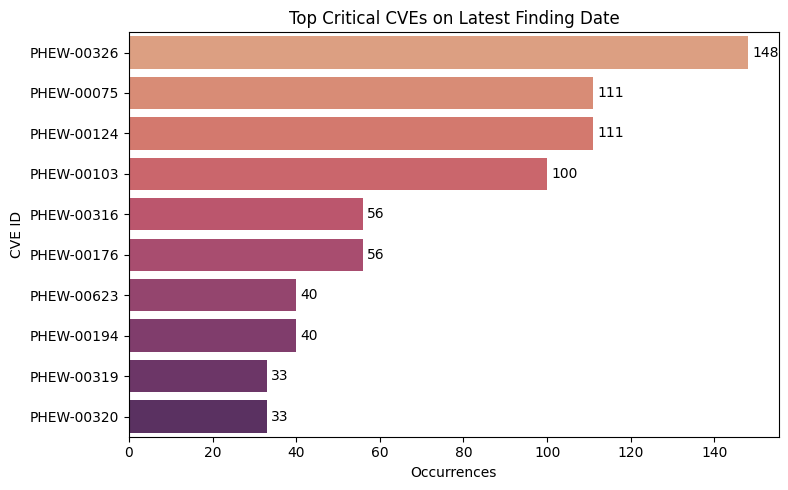

In [ ]:
# Visualise critical CVE distribution with data labels
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=top_cves.head(10), x="Count", y="CVE ID", palette="flare")
plt.title("Top Critical CVEs on Latest Finding Date")
plt.xlabel("Occurrences")
plt.ylabel("CVE ID")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()